# Loading Data

In [1]:
import numpy as np
import os

In [2]:
# load the current video features
base = 'output_mkv'
base_2 = 'output_mp4'

X = []
Y = []
for f in os.listdir(base):
    if f.endswith('.npy'):
        f_2 = f[:-9] + '1_vgg.npy'
        f = os.path.join(base, f)
        f_2 = os.path.join(base_2, f_2)
        if not os.path.exists(f_2):
            print(f_2)
        X.append(np.load(f))
        Y.append(np.load(f_2))

Y = np.asarray(Y)
X = np.asarray(X)
print(Y.shape)
print(X.shape)



(569, 4096)
(569, 4096)


In [3]:
print(Y[-1])
print(X[-1])

[0.01176646 0.06696985 0.06043117 ... 0.0153831  0.72188234 1.37248094]
[-0.05813786 -0.09971369  0.12266724 ... -0.3428845   0.050877
  1.88082035]


# Sklearn Correlation For Video

Find correlation between the two video feeds with Canonical Correlation Analysis.

In [4]:
from sklearn.cross_decomposition import CCA


model_10 = CCA(10)
model_10.fit(X, Y)

X_c, Y_c = model_10.transform(X, Y)

print(X_c.shape)
print(Y_c.shape)

(569, 10)
(569, 10)


In [7]:
from sklearn.cross_decomposition import CCA


model = CCA(1)
model.fit(X, Y)

X_c= model.transform(X)
Y_c = model.transform(Y)
print(X_c.shape)
print(Y_c.shape)

(569, 1)
(569, 1)


# Graphs

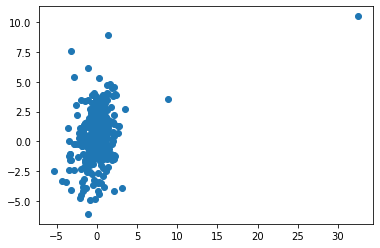

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_c, Y_c)

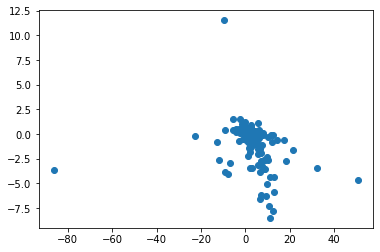

In [10]:
from sklearn.cross_decomposition import CCA


model = CCA(1)
model.fit(Y, X)

X_c= model.transform(X)
Y_c = model.transform(Y)
plt.scatter(X_c, Y_c)